In [160]:
import time

In [188]:
%load_ext autoreload
%autoreload 2

import crossrefexp as exp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
mds = exp.MetaDataStore()

2 metadata loaded from `data/cachefile.pickle`


In [192]:
mds.get( '10.1063/1.868630' )

KeyError: 'doi'

In [184]:
get_metadata = exp.initMetadataStore()

`data/cachefile.pickle` not found. A new file will be created.


In [186]:
get_metadata('10.1063/1.868630')

metadata retrieved from Crossref in 0.632 s.


{'DOI': '10.1063/1.868630',
 'ISSN': ['1070-6631', '1089-7666'],
 'URL': 'http://dx.doi.org/10.1063/1.868630',
 'alternative-id': ['10.1063/1.868630'],
 'author': [{'affiliation': [],
   'family': 'Neitzel',
   'given': 'G. P.',
   'sequence': 'first'},
  {'affiliation': [],
   'family': 'Kirkconnell',
   'given': 'C. S.',
   'sequence': 'additional'},
  {'affiliation': [],
   'family': 'Little',
   'given': 'L. J.',
   'sequence': 'additional'}],
 'container-title': ['Physics of Fluids'],
 'content-domain': {'crossmark-restriction': False, 'domain': []},
 'created': {'date-parts': [[2002, 7, 26]],
  'date-time': '2002-07-26T12:09:39Z',
  'timestamp': 1027685379000},
 'deposited': {'date-parts': [[2016, 12, 27]],
  'date-time': '2016-12-27T06:19:13Z',
  'timestamp': 1482819553000},
 'indexed': {'date-parts': [[2018, 5, 3]],
  'date-time': '2018-05-03T03:42:36Z',
  'timestamp': 1525318956126},
 'is-referenced-by-count': 3,
 'issn-type': [{'type': 'print', 'value': '1070-6631'},
  {'type

In [ ]:
getmetadata = initMetadataCache( cachePath )

In [ ]:
getmetadata(doi).info

In [162]:
gr = exp.ReferenceGraph( '10.1063/1.868629', getmetadata )
gr = exp.ReferenceGraph( '10.1063/1.868629', metadatastore )

19 metadata loaded from `data/cachefile.pickle`


In [163]:
gr.print_node_info('10.1063/1.868629')

(1995) Effect of film elasticity on the drift velocity of capillary–gravity waves
   Jan Erik Weber et al. - Physics of Fluids
   http://dx.doi.org/10.1063/1.868629


In [195]:
gr = exp.ReferenceGraph( '10.1063/1.868629' )
gr.grow(2, get_metadata)

2 metadata loaded from `data/cachefile.pickle`
metadata retrieved from Crossref in 0.610 s.


PicklingError: Can't pickle <class 'crossrefexp.MetaData'>: it's not the same object as crossrefexp.MetaData

In [165]:
len( gr )

71

In [ ]:
# futur:
gr = ReferenceGraph( doi )
gr.grow( 3 ).keep_top(4).knowreduce()


gr = build_reference_graph( doi, grow=3, keeptop=3, knowreduce=True, cachefile='hello.pickle' )


# futur: get_metadata = initMetadataCache( cachePath )


In [166]:
from graphviz import Digraph

In [167]:
rg.last_gen()

2

In [147]:
def getlabel(doi):
    return crossref[doi].label()

color_list = ['red', 'gold1', 'cyan3', 'darkorchid2', 'chartreuse2']
def getcolor(doi):
    return color_list[ rg[doi]['gen'] ]

nodes, links = rg.upward_graph(4)

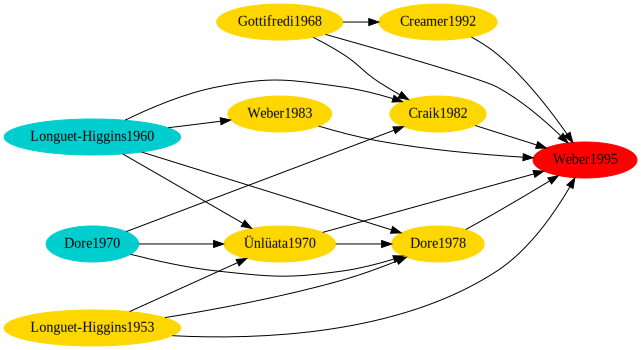

In [148]:
exp.built_graphviz( nodes, links, getlabel, getcolor )

In [11]:
## draft

In [ ]:
    def printstats(self):
        print( 'nbre nodes: {}\nlast gen: {}'.format(self.len, self.lastGen() ) )
        
    
    def degree(self, node):
        return len( self.nodes[node].get('refs', []) ) + len( self.nodes[node].get('citedBy', []) )
        
        
    def nodesVisitedTwice(self, N = 3):
        """ List of nodes visited at least twice (N times)
            i.e. nodes with an out_degree >= N
        """
        isVisitedTwice = lambda node: len(node.get('citedBy', []))>=N
        return [ doi for doi, node in self.nodes.items() if isVisitedTwice(node) ]

        
    def nodesToDraw(self, N = 3 ):
        """ Keep the nodes only cited more than N times
            and rebuild the upward graph
        """
        nodesToCheck = self.nodesVisitedTwice(N=N)
        nodesToDraw = []
        linksToDraw = []
        while nodesToCheck:
            doi = nodesToCheck.pop()
            nodesToDraw.append(doi)

            for citing in self.nodes[doi]['citedBy']:

                linksToDraw.append( (doi, citing) )
                if citing not in nodesToDraw and citing not in nodesToCheck:
                    nodesToCheck.append( citing )

        return nodesToDraw, linksToDraw
        
        
    def builtGraphviz(self, N = 3 ):
        """ Use Graphviz to draw the graph
            return a graphviz object
            
            the color is the generation number
        """
        nodesToDraw, linksToDraw = self.nodesToDraw(N = N )
        
        colorGen = ['red', 'gold1', 'cyan3', 'darkorchid2', 'chartreuse2']
        # see https://graphviz.gitlab.io/_pages/doc/info/colors.html

        DG = Digraph(comment='hello', format='svg', engine='dot' , graph_attr={'size':'10' })#})'root':doi} )
        DG.graph_attr['rankdir'] = 'LR'

        for doi in nodesToDraw:
            info =  self.nodes[doi]
            DG.node(parsedoi(doi), color=colorGen[info['gen']], style='filled', label= buildlabel(doi))

        for source, target in linksToDraw:
            DG.edge(parsedoi(source), parsedoi(target))  

        return DG
        
        
    def mostCited(self):
        """ Shows the most cited articles in the graph
        """
        citedByCount = Counter( { doi:len(info['citedBy']) for doi, info in self.nodes.items() } )
        
        for doi, count in citedByCount.most_common(4):
            printInfo( doi )
            print('')
    